# Analysis Using Causal Graphs

In [255]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from collections import Counter
from dowhy import CausalModel

plt.style.use('ggplot')
SEED = 42
np.random.seed(SEED)
DATA_DIR = 'data/processed'
warnings.simplefilter(action='ignore', category=FutureWarning)

## Generating Causal Graphs

In [256]:
"""
We used the following prompt:
Please construct the causal graph of the following variables where "Target"= Success in academic program. Please include beforehand the causal relation "Adult" -> "Target. Provide the answer in doi format for suitable for the DoWhy framework:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 
'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation', 'Admission grade', 'Displaced', 'Educational special needs', 
'Gender', 'Scholarship holder', 'Unemployment rate', 'Inflation rate', 'GDP','Target', 'Adult']
"""

causal_graph_gpt_o3 = """
digraph {
  "GDP" -> "Adult";
  "GDP" -> "Scholarship holder";
  "GDP" -> "Mother's qualification";
  "GDP" -> "Father's qualification";
  "GDP" -> "Mother's occupation";
  "GDP" -> "Father's occupation";
  "Unemployment rate" -> "Adult";
  "Unemployment rate" -> "Scholarship holder";
  "Inflation rate" -> "Adult";
  "Inflation rate" -> "Scholarship holder";
  "Gender" -> "Adult";
  "Gender" -> "Previous qualification";
  "Gender" -> "Application mode";
  "Gender" -> "Course";
  "Marital status" -> "Adult";
  "Marital status" -> "Daytime/evening attendance";
  "Mother's qualification" -> "Previous qualification";
  "Father's qualification" -> "Previous qualification";
  "Mother's qualification" -> "Adult";
  "Father's qualification" -> "Adult";
  "Mother's occupation" -> "Previous qualification";
  "Father's occupation" -> "Previous qualification";
  "Mother's occupation" -> "Admission grade";
  "Father's occupation" -> "Admission grade";
  "Previous qualification" -> "Previous qualification (grade)";
  "Previous qualification" -> "Admission grade";
  "Previous qualification (grade)" -> "Course";
  "Displaced" -> "Previous qualification";
  "Educational special needs" -> "Previous qualification (grade)";
  "Educational special needs" -> "Target";
  "Application mode" -> "Application order";
  "Application mode" -> "Admission grade";
  "Application order" -> "Admission grade";
  "Daytime/evening attendance" -> "Admission grade";
  "Admission grade" -> "Target";
  "Course" -> "Target";
  "Scholarship holder" -> "Target";
  "Adult" -> "Application mode";
  "Adult" -> "Application order";
  "Adult" -> "Previous qualification";
  "Adult" -> "Course";
  "Adult" -> "Target";
}
"""

causal_graph_gpt_o1 = """
digraph {
  "Mother's qualification" -> "Adult";
  "Mother's qualification" -> "Target";
  "Father's qualification" -> "Adult";
  "Father's qualification" -> "Target";
  "GDP" -> "Adult";
  "GDP" -> "Target";
  "Gender" -> "Adult";
  "Gender" -> "Target";
  "Marital status" -> "Adult";
  "Marital status" -> "Target";
  "Mother's occupation" -> "Adult";
  "Mother's occupation" -> "Admission grade";
  "Mother's occupation" -> "Target";
  "Father's occupation" -> "Adult";
  "Father's occupation" -> "Admission grade";
  "Father's occupation" -> "Target";
  "Unemployment rate" -> "Adult";
  "Unemployment rate" -> "Scholarship holder";
  "Unemployment rate" -> "Target";
  "Inflation rate" -> "Adult";
  "Inflation rate" -> "Scholarship holder";
  "Inflation rate" -> "Target";
  "Adult" -> "Target";
  "Adult" -> "Application mode";
  "Adult" -> "Application order";
  "Adult" -> "Previous qualification";
  "Adult" -> "Daytime/evening attendance";
  "Adult" -> "Course";
  "Displaced" -> "Previous qualification";
  "Displaced" -> "Educational special needs";
  "Gender" -> "Application mode";
  "Gender" -> "Course";
  "Gender" -> "Previous qualification";
  "Gender" -> "Admission grade";
  "Mother's qualification" -> "Previous qualification";
  "Father's qualification" -> "Previous qualification";
  "Previous qualification" -> "Previous qualification (grade)";
  "Previous qualification" -> "Admission grade";
  "Previous qualification" -> "Course";
  "Previous qualification (grade)" -> "Admission grade";
  "Educational special needs" -> "Previous qualification (grade)";
  "Educational special needs" -> "Target";
  "Application mode" -> "Application order";
  "Application mode" -> "Admission grade";
  "Application order" -> "Admission grade";
  "Marital status" -> "Daytime/evening attendance";
  "Daytime/evening attendance" -> "Target";
  "Admission grade" -> "Target";
  "Course" -> "Target";
  "Scholarship holder" -> "Target";
  "GDP" -> "Mother's qualification";
  "GDP" -> "Father's qualification";
  "GDP" -> "Mother's occupation";
  "GDP" -> "Father's occupation";
  "Unemployment rate" -> "Scholarship holder";
  "Inflation rate" -> "Scholarship holder";
}
"""

causal_graph_gpt_o4 = """
digraph {
    "Adult" -> "Target";
    "Marital status" -> "Target";
    "Application mode" -> "Target";
    "Application order" -> "Target";
    "Course" -> "Target";
    "Daytime/evening attendance" -> "Target";
    "Previous qualification" -> "Target";
    "Previous qualification (grade)" -> "Target";
    "Mother's qualification" -> "Target";
    "Father's qualification" -> "Target";
    "Mother's occupation" -> "Target";
    "Father's occupation" -> "Target";
    "Admission grade" -> "Target";
    "Displaced" -> "Target";
    "Educational special needs" -> "Target";
    "Gender" -> "Target";
    "Scholarship holder" -> "Target";
    "Unemployment rate" -> "Target";
    "Inflation rate" -> "Target";
    "GDP" -> "Target";

    "Marital status" -> "Adult";
    "Application mode" -> "Admission grade";
    "Application order" -> "Admission grade";
    "Course" -> "Daytime/evening attendance";
    "Previous qualification" -> "Previous qualification (grade)";
    "Mother's qualification" -> "Mother's occupation";
    "Father's qualification" -> "Father's occupation";
    "Mother's qualification" -> "Previous qualification";
    "Father's qualification" -> "Previous qualification";
    "Mother's occupation" -> "Previous qualification";
    "Father's occupation" -> "Previous qualification";
    "Previous qualification (grade)" -> "Admission grade";
    "Admission grade" -> "Scholarship holder";
    "Unemployment rate" -> "Scholarship holder";
    "Inflation rate" -> "Scholarship holder";
    "GDP" -> "Scholarship holder";
}
"""

## Visualizing the Causal Graphs Created by the different LLMs

In [257]:
DATA_DIR = 'data/processed'
file_path = os.path.join(DATA_DIR, f"processed_age_21_outcome_strict.csv")
df = pd.read_csv(file_path)

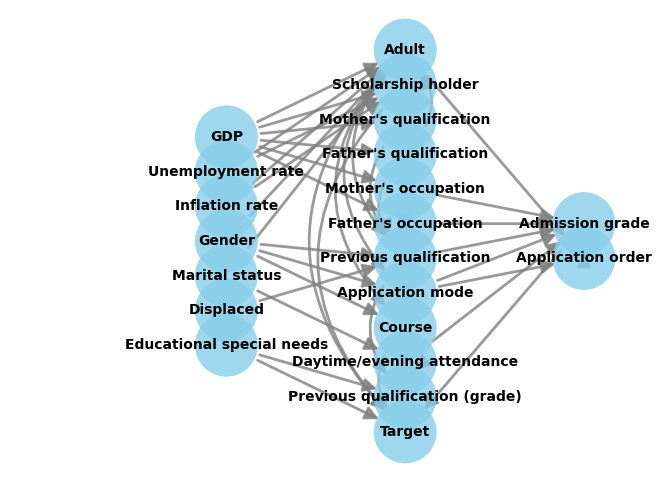

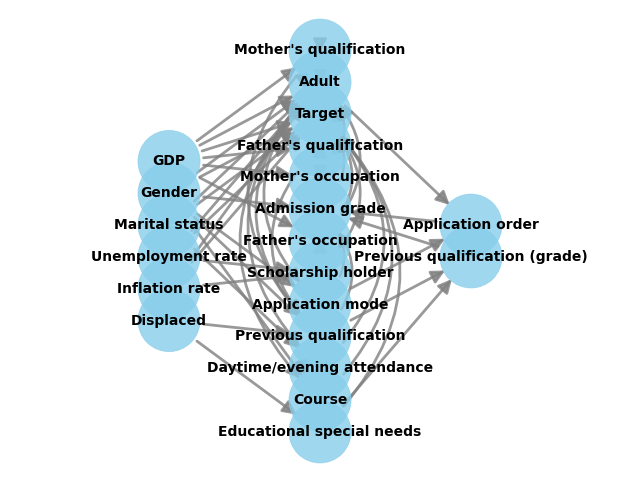

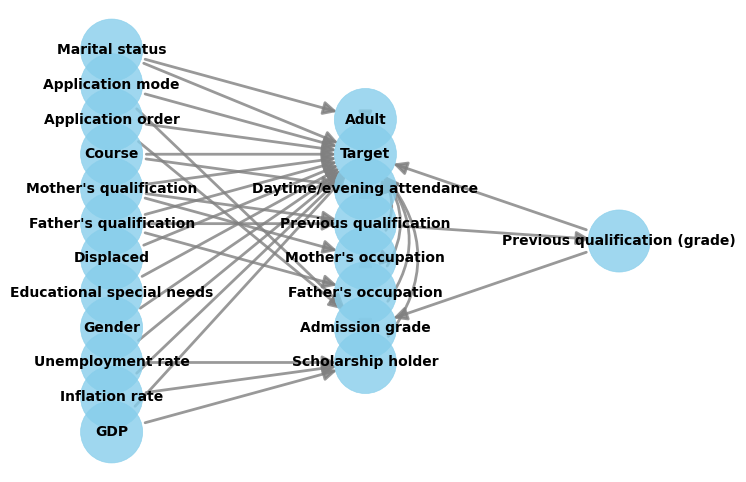

<Figure size 640x480 with 0 Axes>

In [258]:
# Define the models and their corresponding causal graphs
models = {
    "GPT-o3-mini-high": causal_graph_gpt_o3,
    "GPT-o1": causal_graph_gpt_o1,
    "GPT-o4": causal_graph_gpt_o4
}

# Loop through each model and plot the causal graph
for i, (model_name, causal_graph) in enumerate(models.items()):
    # Create the causal model
    model = CausalModel(
        data=df,
        treatment="Adult",
        outcome="Target",
        graph=causal_graph
    )
    
    # Render the causal graph and save it to a file
    model.view_model()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# DoWhy Analysis

In [259]:
age_thresholds = [20, 21, 23]
outcome_types = ['strict', 'inclusive']

methods = {
    "IPW": "backdoor.propensity_score_weighting",
    "PSM": "backdoor.propensity_score_matching",
}

# Define the models and their corresponding causal graphs
models = {
    "GPT-o3-mini-high": causal_graph_gpt_o3,
    "GPT-o1": causal_graph_gpt_o1,
    "GPT-o4": causal_graph_gpt_o4
}

configurations = {(age_threshold, outcome_type, method, model) for age_threshold in age_thresholds for outcome_type in outcome_types for method in methods for model in models}
results = {configuration: 0 for configuration in configurations}
results_ci = {configuration: [] for configuration in configurations}

In [260]:
# Loop through each configuration, method and model to estimate the ATE
for age_threshold in age_thresholds:
    for outcome_definition in outcome_types:
        for method_name, method in methods.items():
            for model_name, causal_graph in models.items():
                # Define the file path for the data
                file_path = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_definition}.csv")
                df = pd.read_csv(file_path)
                
                # Create the causal model
                model = CausalModel(
                    data=df,
                    treatment="Adult",
                    outcome="Target",
                    graph=causal_graph
                )
                
                # Estimate the ATE
                identified_estimand = model.identify_effect()
                method_params = {
                    "random_state": SEED,  # Ensure DoWhy uses the same seed
                    "num_simulations": 500,  # Fix bootstrap sample size
                    "max_iter": 1000,  # Ensure iteration consistency
                }   
                estimate = model.estimate_effect(identified_estimand, method_name=method, method_params=method_params)

                # Extract ATE
                ate = estimate.value
                # Extract confidence interval
                ate_ci = estimate.get_confidence_intervals()  # 95% confidence interval

                # Print the results
                print(f"ATE (Age Threshold >= {age_threshold}, Outcome Definition: {outcome_definition}, Method: {method_name}, Model: {model_name}): {ate}")
                print(f"95% CI: {ate_ci}")

                # Store the results
                results[(age_threshold, outcome_definition, method_name, model_name)] = ate
                results_ci[(age_threshold, outcome_definition, method_name, model_name)] = ate_ci

ATE (Age Threshold >= 20, Outcome Definition: strict, Method: IPW, Model: GPT-o3-mini-high): -0.15009724715962863
95% CI: (-0.1903807951057846, -0.11732141010052255)
ATE (Age Threshold >= 20, Outcome Definition: strict, Method: IPW, Model: GPT-o1): -0.1843237240127969
95% CI: (-0.22022712240931552, -0.1478532431304323)
ATE (Age Threshold >= 20, Outcome Definition: strict, Method: IPW, Model: GPT-o4): -0.22612965248421785
95% CI: (-0.2565009849489927, -0.19477866378354403)
ATE (Age Threshold >= 20, Outcome Definition: strict, Method: PSM, Model: GPT-o3-mini-high): -0.18780889621087316
95% CI: (-0.2915980230642504, -0.14685808425511887)
ATE (Age Threshold >= 20, Outcome Definition: strict, Method: PSM, Model: GPT-o1): -0.21322664156272064
95% CI: (-0.27771240291833377, -0.1772181689809367)
ATE (Age Threshold >= 20, Outcome Definition: strict, Method: PSM, Model: GPT-o4): -0.6055542480583667
95% CI: (-1.5017651212049894, -0.5914332784184514)
ATE (Age Threshold >= 20, Outcome Definition: i

## Saving The Results

In [261]:
# Convert dictionary to a list of tuples for DataFrame creation, now including method name
data = [
    (age, outcome, method, model, ate, ci[0], ci[1]) 
    for (age, outcome, method, model), ate in results.items()
    for ci in [results_ci.get((age, outcome, method, model), [None, None])]
]

# Create DataFrame with separate columns for each tuple element and confidence interval bounds
df_ate_results = pd.DataFrame(data, columns=["Age Threshold", "Outcome Type", "Method", "Model", "ATE", "CI Lower", "CI Upper"])
df_ate_results = df_ate_results.round(4)

# Sort by age threshold, outcome type, method and model
df_ate_results = df_ate_results.sort_values(by=["Age Threshold", "Outcome Type", "Method", "Model"], ascending=[True, False, True, True])
df_ate_results = df_ate_results.reset_index(drop=True)

# Save to CSV file
csv_file_path = "results/ate_results_with_dowhy.csv"
df_ate_results.to_csv(csv_file_path, index=False)

print(f"ATE results with confidence intervals saved to {csv_file_path}")

ATE results with confidence intervals saved to results/ate_results_with_dowhy.csv


## Plotting the Results

### Distribution of ATE Across Configurations

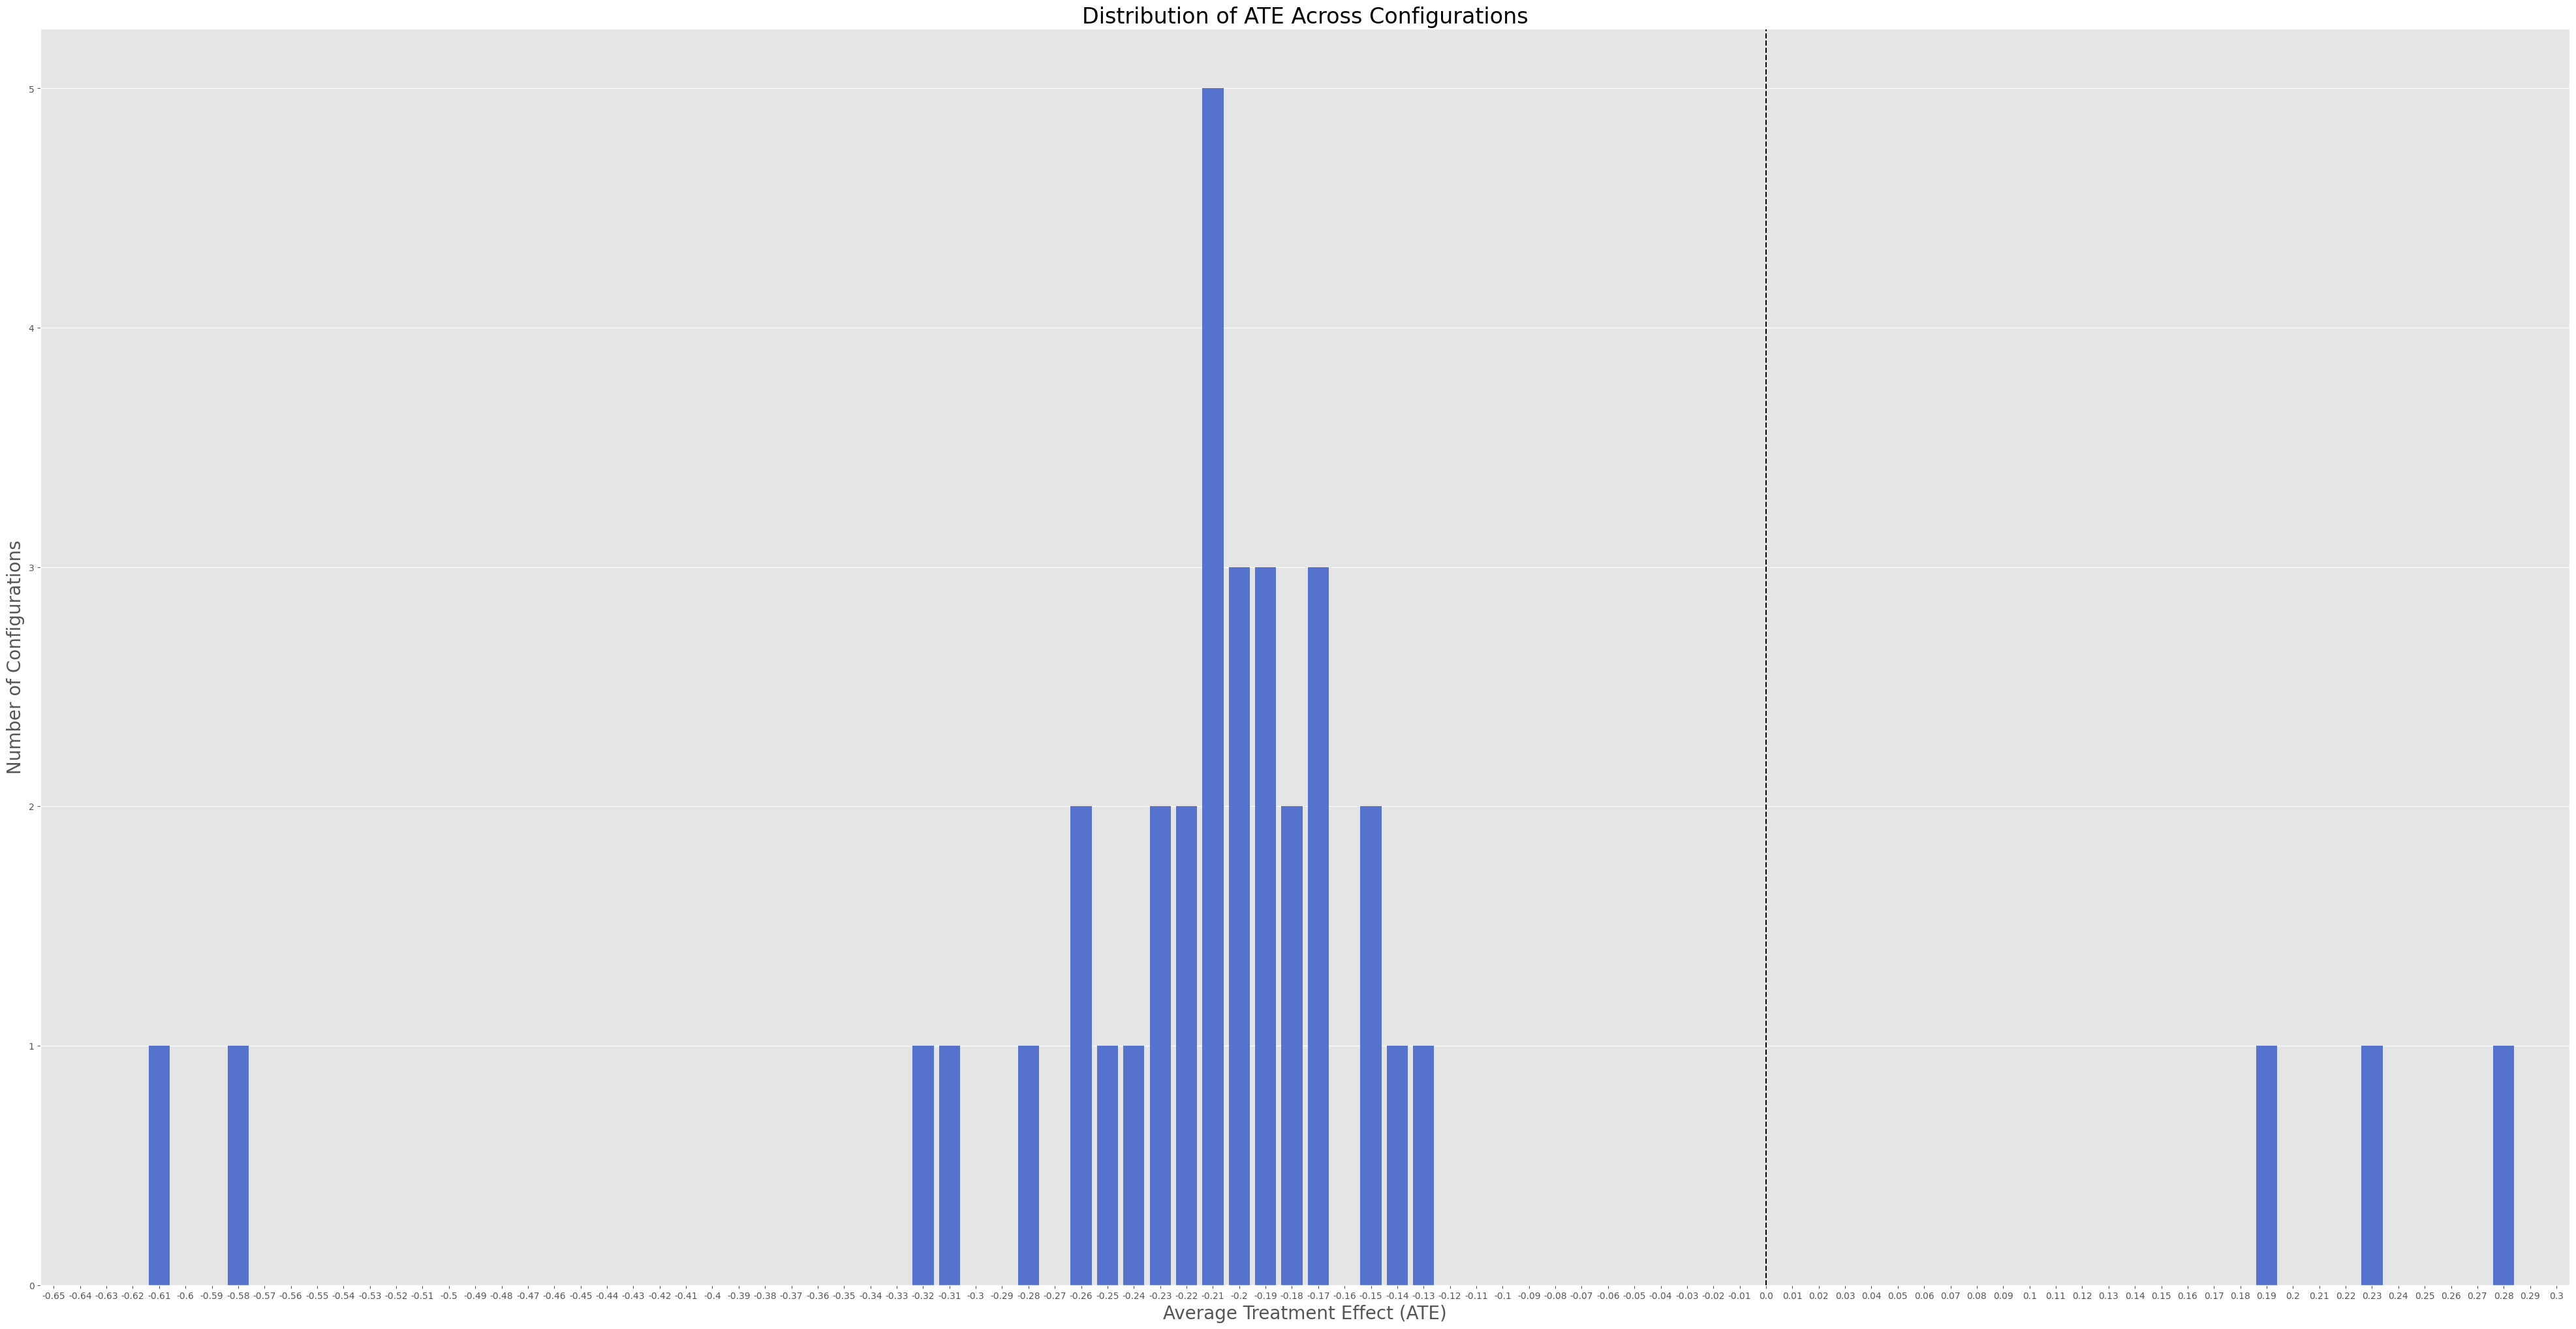

In [262]:
ate_values = results.values()
ate_values = [round(ate, 2) for ate in ate_values]

# Count occurrences of each ATE
ate_counts = Counter(ate_values)

# Convert to lists for plotting
unique_ates = list(ate_counts.keys())
counts = list(ate_counts.values())

# Add missing ATE values
ate_range = np.round(np.arange(-0.65, 0.31, 0.01), 2)
for ate in ate_range:
    if ate not in unique_ates:
        unique_ates.append(ate)
        counts.append(0)

# Plot the bar chart
plt.figure(figsize=(50, 25))
sns.barplot(x=unique_ates, y=counts, color="royalblue")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=20)
plt.ylabel("Number of Configurations", fontsize=20)
plt.title("Distribution of ATE Across Configurations", fontsize=24)

plt.yticks([0, 1, 2, 3, 4, 5])

# Mark the 0 ATE line
plt.axvline(x=65, color="black", linestyle="--")

# Show the plot
plt.show()

### Distribution of ATE Across Configurations By Model

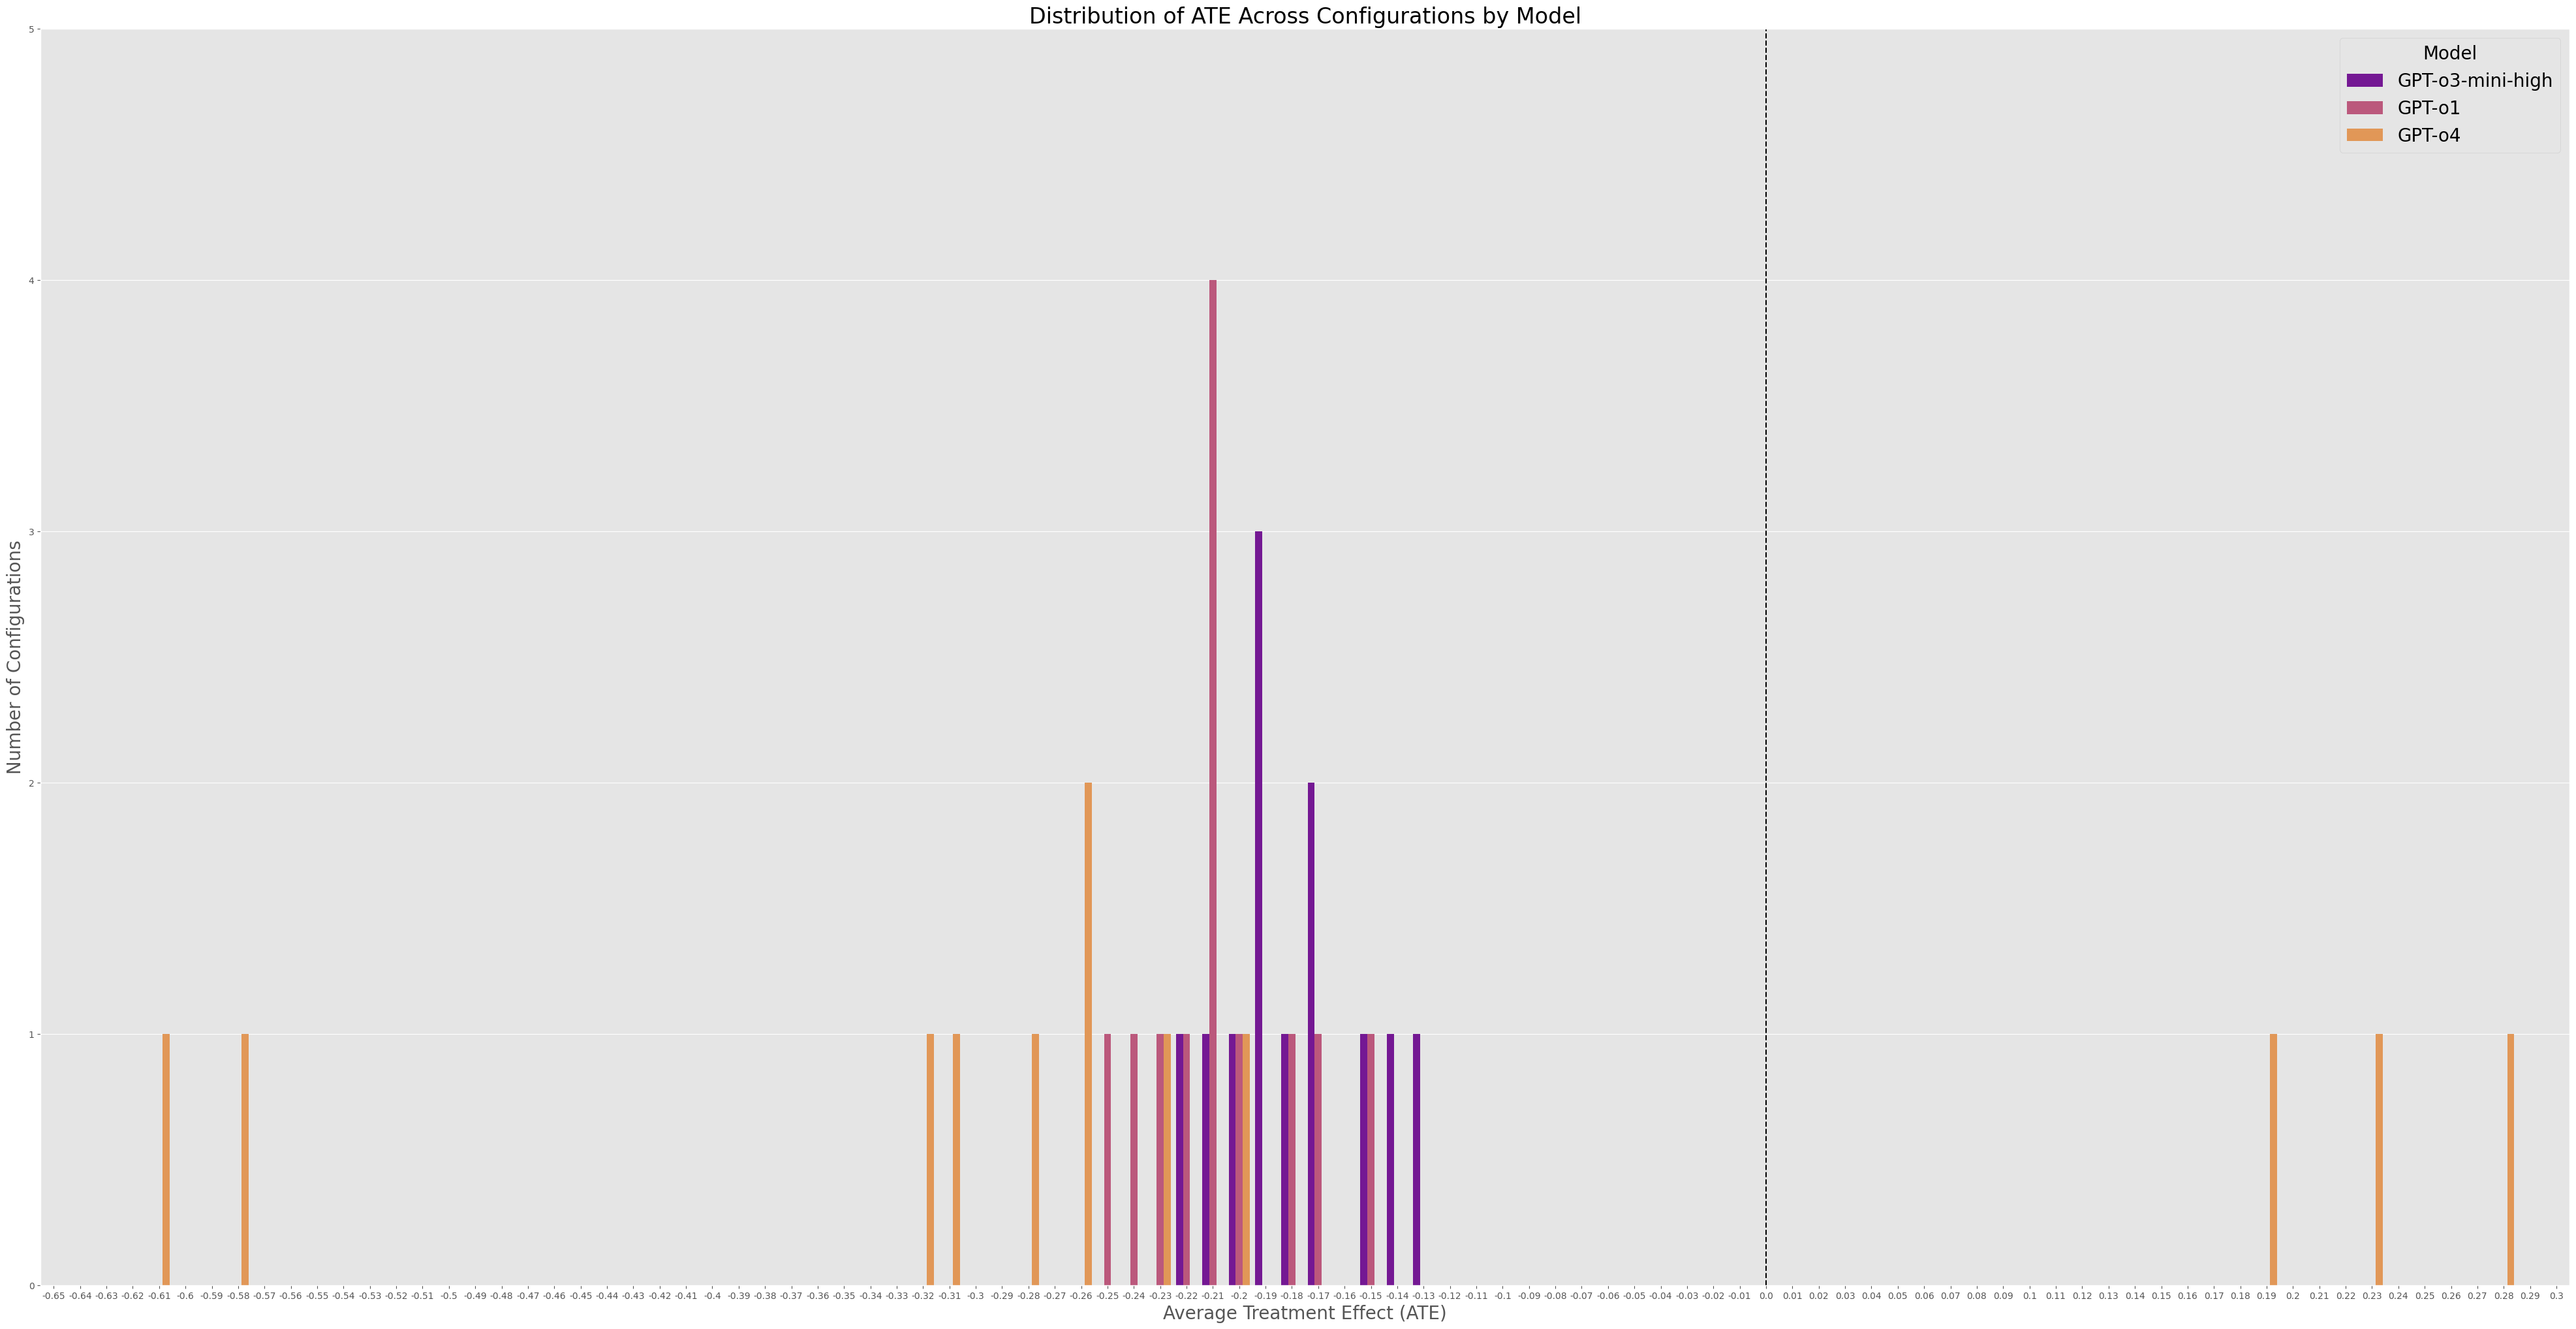

In [263]:
# Extract ATE values and corresponding models
ate_data = [(round(ate, 2), model) for (age, outcome, method, model), ate in results.items()]

# Convert to DataFrame for plotting
import pandas as pd
df_ate = pd.DataFrame(ate_data, columns=["ATE", "Model"])

# Count occurrences of each ATE per model
df_ate_counts = df_ate.groupby(["ATE", "Model"]).size().reset_index(name="Count")

# Add missing ATE values for each model
ate_range = np.round(np.arange(-0.65, 0.31, 0.01), 2)
models = df_ate["Model"].unique()
complete_data = []

for model in models:
    existing_ates = df_ate[df_ate["Model"] == model]["ATE"].tolist()
    for ate in ate_range:
        if ate not in existing_ates:
            complete_data.append((ate, model, 0))

# Append missing values to the DataFrame
df_ate_counts = pd.concat([df_ate_counts, pd.DataFrame(complete_data, columns=["ATE", "Model", "Count"])])

# Sort ATE values
df_ate_counts = df_ate_counts.sort_values(by="ATE")

# Plot the grouped bar chart
plt.figure(figsize=(50, 25))
sns.barplot(x="ATE", y="Count", hue="Model", data=df_ate_counts, palette="plasma")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=20)
plt.ylabel("Number of Configurations", fontsize=20)
plt.title("Distribution of ATE Across Configurations by Model", fontsize=24)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.legend(title="Model", title_fontsize="20", fontsize="20")

# Mark the 0 ATE line
plt.axvline(x=65, color="black", linestyle="--")

# Show the plot
plt.show()


### Distribution of ATE Across Configurations By Age Threshold

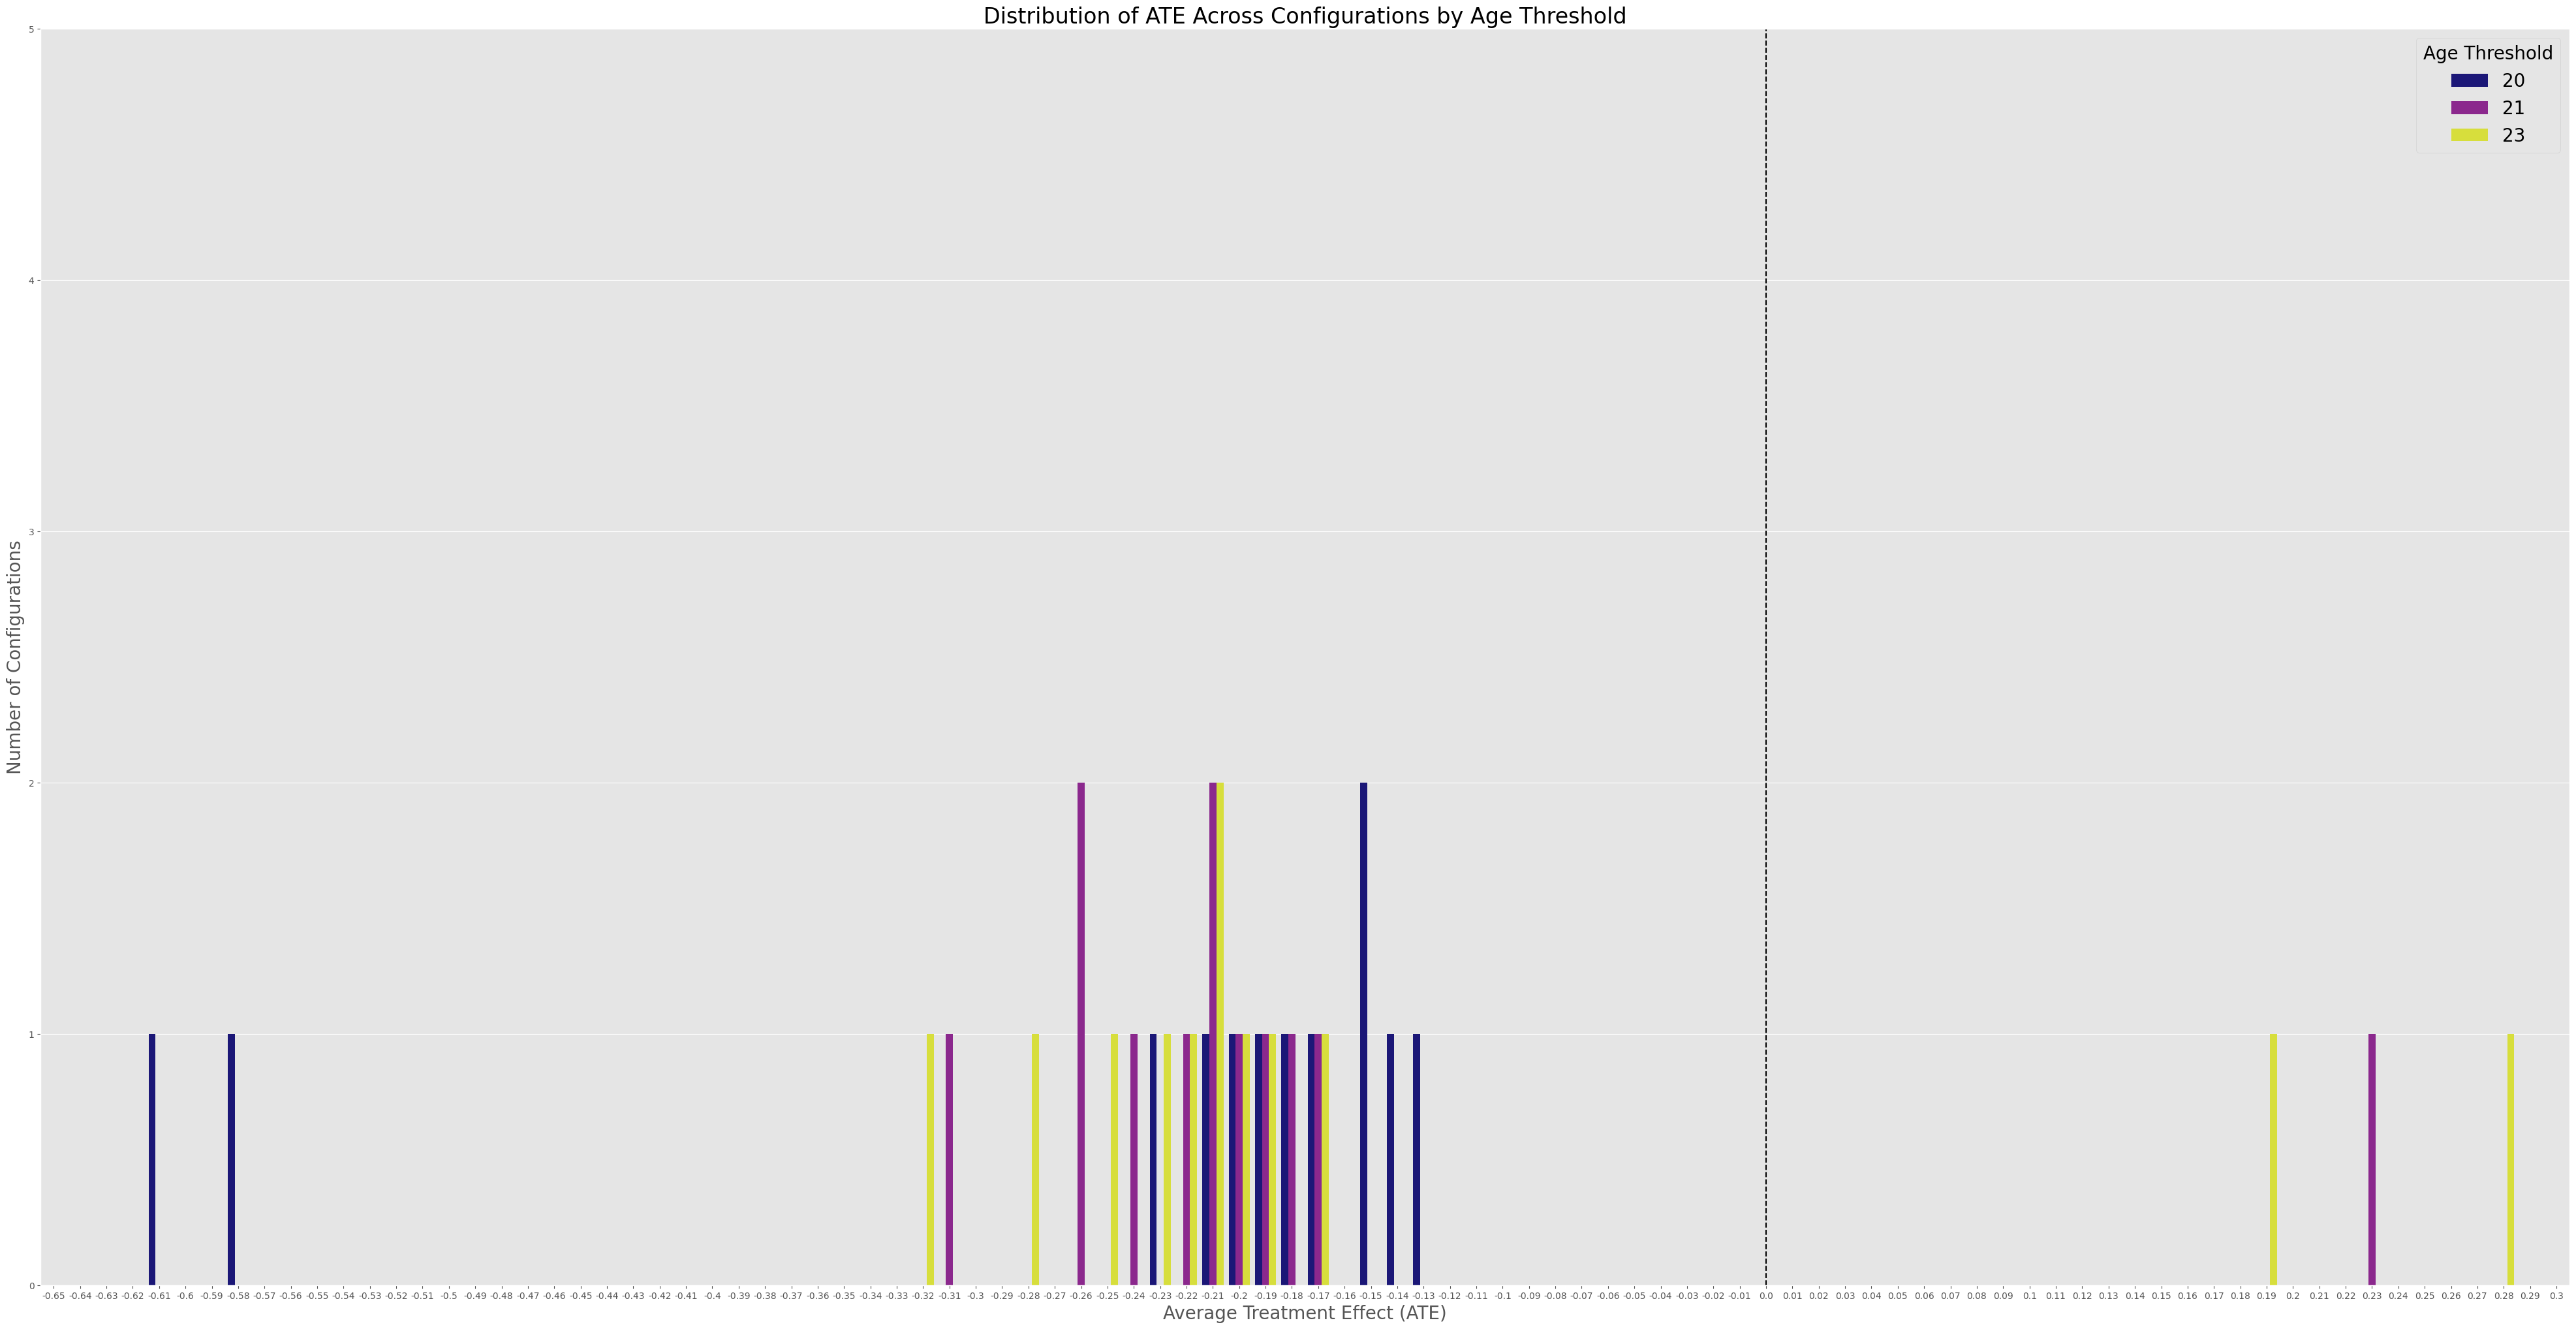

In [264]:
# Extract ATE values and corresponding age thresholds
ate_data = [(round(ate, 2), age) for (age, outcome, method, model), ate in results.items()]

# Convert to DataFrame for plotting
df_ate = pd.DataFrame(ate_data, columns=["ATE", "Age Threshold"])

# Count occurrences of each ATE per age threshold
df_ate_counts = df_ate.groupby(["ATE", "Age Threshold"]).size().reset_index(name="Count")

# Add missing ATE values for each age threshold
ate_range = np.round(np.arange(-0.65, 0.31, 0.01), 2)
age_thresholds = df_ate["Age Threshold"].unique()
complete_data = []

for age in age_thresholds:
    existing_ates = df_ate[df_ate["Age Threshold"] == age]["ATE"].tolist()
    for ate in ate_range:
        if ate not in existing_ates:
            complete_data.append((ate, age, 0))

# Append missing values to the DataFrame
df_ate_counts = pd.concat([df_ate_counts, pd.DataFrame(complete_data, columns=["ATE", "Age Threshold", "Count"])])

# Sort ATE values
df_ate_counts = df_ate_counts.sort_values(by="ATE")

# Plot the grouped bar chart
plt.figure(figsize=(50, 25))
sns.barplot(x="ATE", y="Count", hue="Age Threshold", data=df_ate_counts, palette="plasma")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=20)
plt.ylabel("Number of Configurations", fontsize=20)
plt.title("Distribution of ATE Across Configurations by Age Threshold", fontsize=24)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.legend(title="Age Threshold", title_fontsize="20", fontsize="20")

# Mark the 0 ATE line
plt.axvline(x=65, color="black", linestyle="--")

# Show the plot
plt.show()

### Distribution of ATE Across Configurations By Outcome Definition

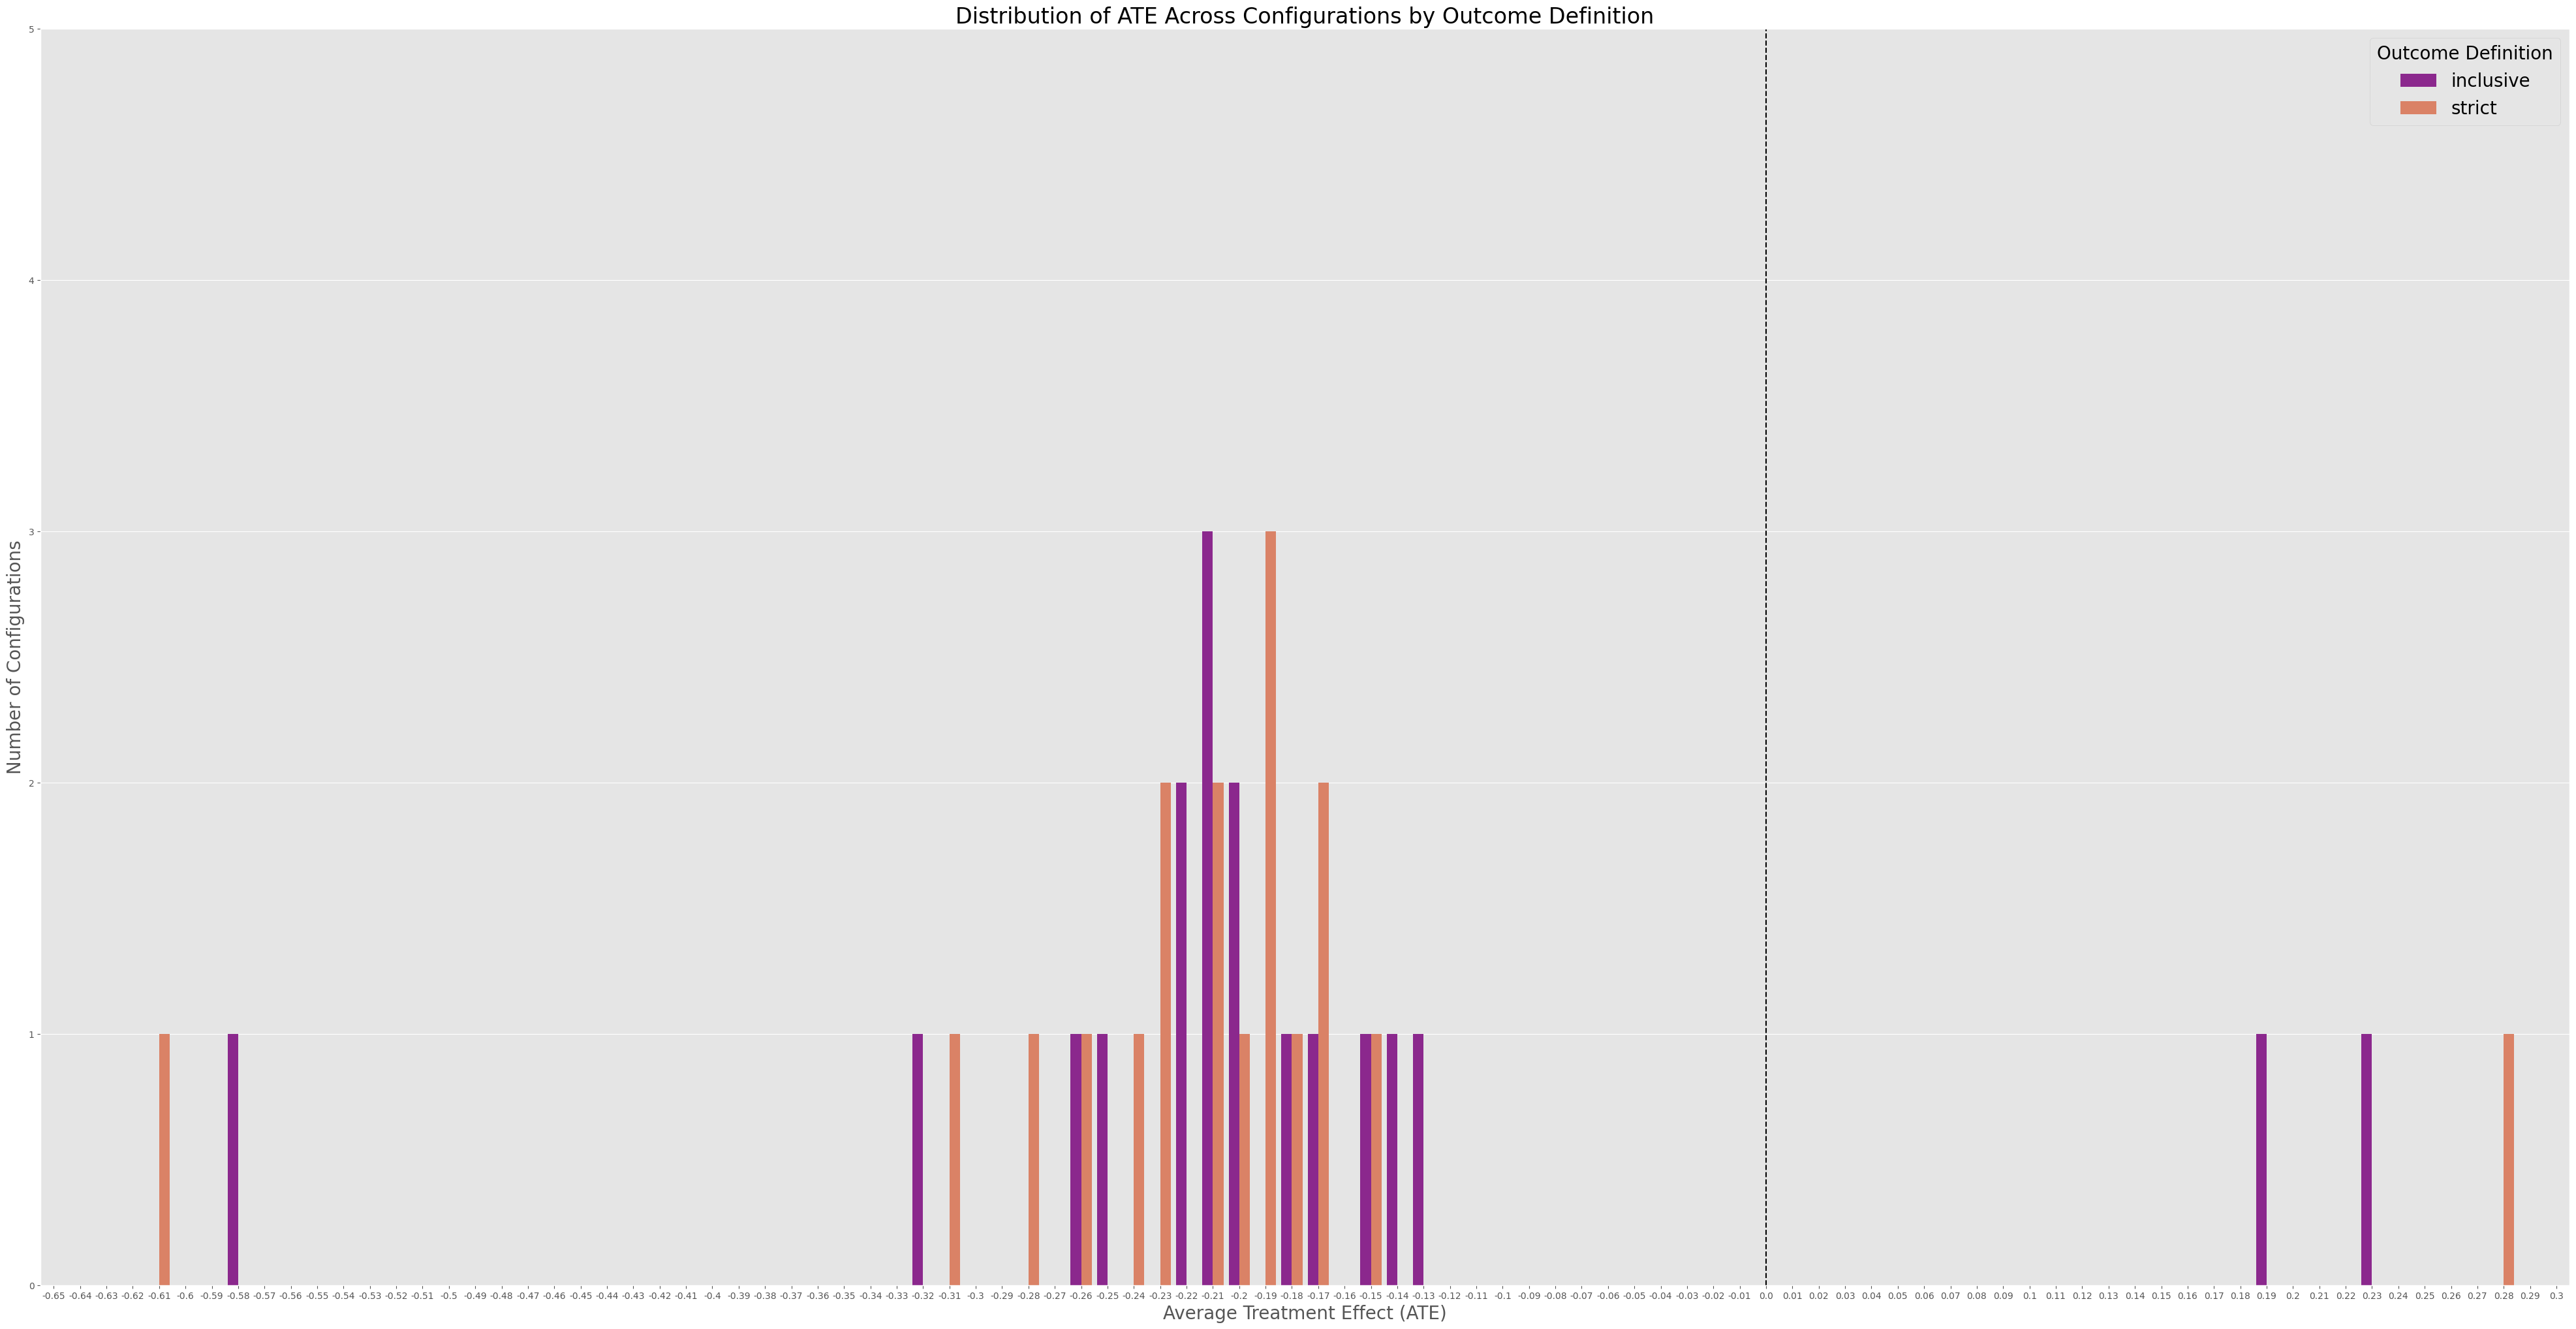

In [265]:
# Extract ATE values and corresponding outcome definitions
ate_data = [(round(ate, 2), outcome) for (age, outcome, method, model), ate in results.items()]

# Convert to DataFrame for plotting
df_ate = pd.DataFrame(ate_data, columns=["ATE", "Outcome Definition"])

# Count occurrences of each ATE per outcome definition
df_ate_counts = df_ate.groupby(["ATE", "Outcome Definition"]).size().reset_index(name="Count")

# Add missing ATE values for each outcome definition
ate_range = np.round(np.arange(-0.65, 0.31, 0.01), 2)
outcomes = df_ate["Outcome Definition"].unique()
complete_data = []

for outcome in outcomes:
    existing_ates = df_ate[df_ate["Outcome Definition"] == outcome]["ATE"].tolist()
    for ate in ate_range:
        if ate not in existing_ates:
            complete_data.append((ate, outcome, 0))

# Append missing values to the DataFrame
df_ate_counts = pd.concat([df_ate_counts, pd.DataFrame(complete_data, columns=["ATE", "Outcome Definition", "Count"])])

# Sort ATE values
df_ate_counts = df_ate_counts.sort_values(by="ATE")

# Plot the grouped bar chart
plt.figure(figsize=(50, 25))
sns.barplot(x="ATE", y="Count", hue="Outcome Definition", data=df_ate_counts, palette="plasma")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=20)
plt.ylabel("Number of Configurations", fontsize=20)
plt.title("Distribution of ATE Across Configurations by Outcome Definition", fontsize=24)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.legend(title="Outcome Definition", title_fontsize="20", fontsize="20")

# Mark the 0 ATE line
plt.axvline(x=65, color="black", linestyle="--")

# Show the plot
plt.show()


### Distribution of ATE Across Configurations By Estimation Method

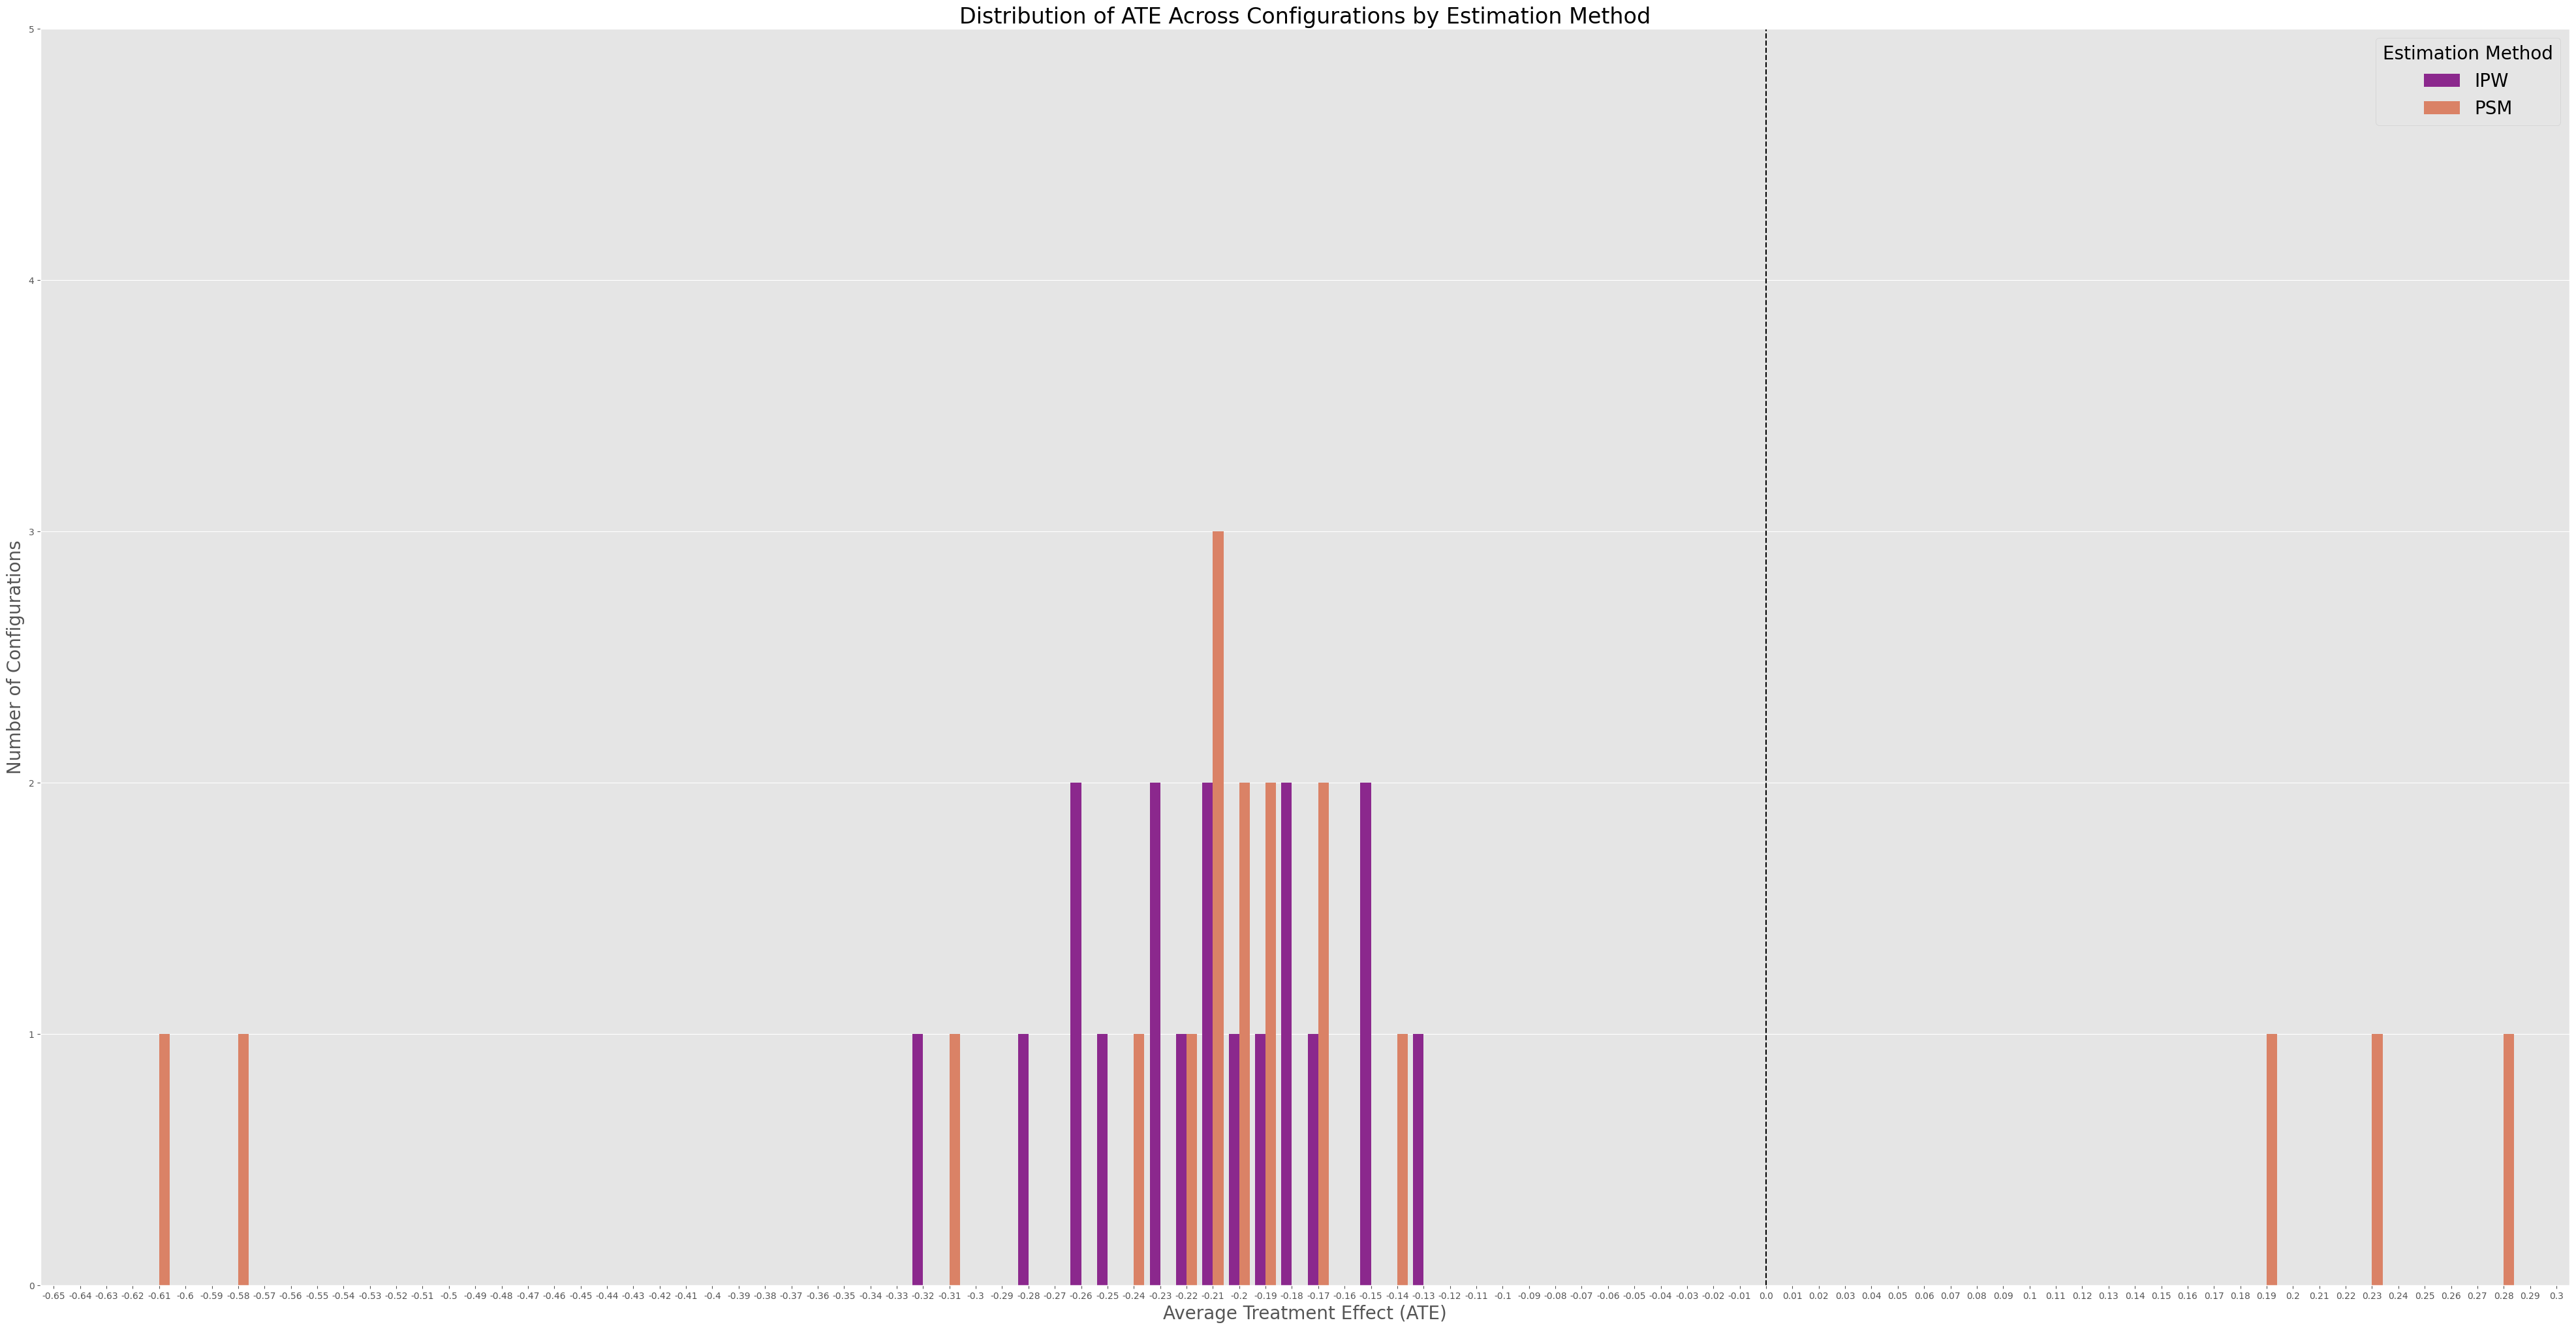

In [266]:
# Extract ATE values and corresponding estimation methods
ate_data = [(round(ate, 2), method) for (age, outcome, method, model), ate in results.items()]

# Convert to DataFrame for plotting
df_ate = pd.DataFrame(ate_data, columns=["ATE", "Method"])

# Count occurrences of each ATE per estimation method
df_ate_counts = df_ate.groupby(["ATE", "Method"]).size().reset_index(name="Count")

# Add missing ATE values for each method
ate_range = np.round(np.arange(-0.65, 0.31, 0.01), 2)
methods = df_ate["Method"].unique()
complete_data = []

for method in methods:
    existing_ates = df_ate[df_ate["Method"] == method]["ATE"].tolist()
    for ate in ate_range:
        if ate not in existing_ates:
            complete_data.append((ate, method, 0))

# Append missing values to the DataFrame
df_ate_counts = pd.concat([df_ate_counts, pd.DataFrame(complete_data, columns=["ATE", "Method", "Count"])])

# Sort ATE values
df_ate_counts = df_ate_counts.sort_values(by="ATE")

# Plot the grouped bar chart
plt.figure(figsize=(50, 25))
sns.barplot(x="ATE", y="Count", hue="Method", data=df_ate_counts, palette="plasma")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=20)
plt.ylabel("Number of Configurations", fontsize=20)
plt.title("Distribution of ATE Across Configurations by Estimation Method", fontsize=24)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.legend(title="Estimation Method", title_fontsize="20", fontsize="20")

# Mark the 0 ATE line
plt.axvline(x=65, color="black", linestyle="--")

# Show the plot
plt.show()
